# Emotion Classifier
## Building CNN based on RAVDESS and TESS
### Evan

In [2]:
# Packages for initial data cleaning
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import glob

### Data Preparation and Cleaning

In [3]:
# RAVDESS audio files downloaded from
# https://zenodo.org/record/1188976#.YBcrf3dKh6Q
# Amend as necessary to your directory

file_list_ravdess = glob.glob('/Users/Evan/Desktop/Click/Audio_Beta/RAVDESS/*/*.wav')

In [4]:
# TESS audio files downloaded from
# https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess
# Amend as necessary to your directory
file_list_tess = glob.glob('/Users/Evan/Desktop/Click/TESS/*/*.wav')

In [5]:
# Remove dead space in audio
# (Every 1/10 second compares to threshold)

def envelope(y, sr, threshold):
    mask = []
    y_abs = pd.Series(y).apply(np.abs)
    y_mean = y_abs.rolling(window = int(sr/10), min_periods = 1, center = True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return np.array(y[mask])

In [6]:
def clean_files(files_list):
    
    count = 0

    for file in files_list:
        y, sr = librosa.load(file)
        y = envelope(y, sr, 0.0005)
        save_file = 'clean/' + file
        
        if not os.path.exists(os.path.dirname(save_file)):
            try:
                os.makedirs(os.path.dirname(save_file))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise
        
        with open(save_file, 'w') as new_file:
            sf.write(save_file, y, sr)
            new_file.close()
            
        count += 1
        if count % 100 == 0:
            print('Successfully cleaned and saved 100 files')
    
    print("Finished")

In [7]:
clean_files(file_list_ravdess)

Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Finished


In [8]:
clean_files(file_list_tess)

Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cleaned and saved 100 files
Successfully cle

In [9]:
# Amend as necessary to your directory

ravdess_clean_list = glob.glob('/Users/Evan/Desktop/Click/clean/Users/Evan/Desktop/Click/Audio_Beta/RAVDESS/*/*.wav')

In [10]:
# Function to make RAVDESS index

def make_ravdess_index(file_list):
    
    emotion_labels = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgusted', '08': 'surprised'}
    intensity_labels = {'01': 'normal', '02': 'strong'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'intensity': [], 'statement': [], 'repitition': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('RAVDESS')
        
        df['filename'].append(file)

        props = file.split('/')[13].split('.')[0].split('-')
        df['actor'].append(props[6])
        df['emotion'].append(emotion_labels[props[2]])
        df['intensity'].append(intensity_labels[props[3]])
        df['statement'].append(props[4])
        df['repitition'].append(props[5])

        if int(props[6]) % 2 == 0:
            df['gender'].append('female')
        else:
            df['gender'].append('male')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_dataframe = pd.DataFrame(df)
    
    return file_dataframe

In [11]:
ravdess_index = make_ravdess_index(ravdess_clean_list)

In [12]:
ravdess_index['emotion'].value_counts()

surprised    192
sad          192
calm         192
fearful      192
angry        192
disgusted    192
happy        192
neutral       96
Name: emotion, dtype: int64

In [13]:
# Amend as necessary to your directory

tess_clean_list = glob.glob('/Users/Evan/Desktop/Click/clean/Users/Evan/Desktop/Click/TESS/*/*.wav')

In [14]:
# Function to make TESS index

def make_tess_index(file_list):
    
    emotion_labels = {'neutral': 'neutral', 'happy': 'happy', 'sad': 'sad', 'angry': 'angry',
                   'fear': 'fearful', 'disgust': 'disgusted', 'ps': 'surprised'}

    df = {'dataset': [], 'filename': [], 'actor': [], 'emotion': [], 'statement': [], 'length': [], 'gender': []}

    for file in file_list:
        df['dataset'].append('TESS')
        
        df['filename'].append(file)
        
        props = file.split('/')[12].split('_')
        df['actor'].append(props[0])
        df['emotion'].append(emotion_labels[props[2][:-4]])
        df['statement'].append(props[1])
        df['gender'].append('female')

        y, sr = librosa.load(file)
        df['length'].append(y.shape[0]/sr)

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [15]:
tess_index = make_tess_index(tess_clean_list)

In [16]:
tess_index['emotion'].value_counts()

neutral      400
surprised    400
sad          400
fearful      400
happy        400
angry        400
disgusted    400
Name: emotion, dtype: int64

In [17]:
# Save to .csv

ravdess_index.to_csv('ravdess_index.csv')
tess_index.to_csv('tess_index.csv')

In [18]:
# Reduce to columns of interest

shared_names = ['dataset', 'filename', 'actor', 'emotion', 'length', 'gender']

complete_index = pd.concat([ravdess_index[shared_names], tess_index[shared_names]], axis = 0)
complete_index.reset_index(drop = True, inplace = True)

In [19]:
# Remove calm considering its similarities with neutral
complete_index = complete_index.drop(list(complete_index[complete_index['emotion'] == 'calm'].index), axis = 0).reset_index(drop = True)

In [20]:
complete_index['emotion'].value_counts()

surprised    592
sad          592
fearful      592
happy        592
angry        592
disgusted    592
neutral      496
Name: emotion, dtype: int64

In [21]:
complete_index.shape

(4048, 6)

In [22]:
# Split into training and test sets
from sklearn.model_selection import train_test_split

In [23]:
def assign_sets(complete_index):
    train, test = train_test_split(complete_index, test_size = 0.2, random_state = 42)
    # validation, test = train_test_split(_test, test_size = 0.5, random_state = 42)
    
    set_list = []
    
    for file in complete_index['filename']:
        if file in list(train['filename']):
            set_list.append('train')
#         if file in list(validation['filename']):
#             set_list.append('validation')
        if file in list(test['filename']):
            set_list.append('test')
    
    complete_index['set'] = set_list
    
    return complete_index

In [24]:
complete_index = assign_sets(complete_index)

In [25]:
complete_index[complete_index['set'] == 'train']['emotion'].value_counts()

fearful      483
happy        479
angry        477
disgusted    476
sad          468
surprised    466
neutral      389
Name: emotion, dtype: int64

In [26]:
complete_index[complete_index['set'] == 'train'].shape

(3238, 7)

In [27]:
complete_index[complete_index['set'] == 'test']['emotion'].value_counts()

surprised    126
sad          124
disgusted    116
angry        115
happy        113
fearful      109
neutral      107
Name: emotion, dtype: int64

In [28]:
complete_index.to_csv('complete_index.csv')

In [29]:
# Everything above is for loading and cleaning data
# Everything below is for measuring MFCCs and making the convolutional neural network

### Measuring MFCCs and Making CNN

In [30]:
# Load packages

import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [31]:
file_dataframe = pd.read_csv('complete_index.csv')

In [32]:
file_dataframe['length'].sum() / 60

133.9647747543462

In [33]:
file_dataframe

,Unnamed: 0,dataset,filename,actor,emotion,length,gender,set
0,0,RAVDESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,16,angry,1.994830,female,train
1,1,RAVDESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,16,fearful,1.803583,female,train
2,2,RAVDESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,16,fearful,2.337823,female,train
3,3,RAVDESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,16,angry,2.045805,female,train
4,4,RAVDESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,16,disgusted,1.823946,female,train
...,...,...,...,...,...,...,...,...
4043,4043,TESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,OAF,sad,2.549025,female,train
4044,4044,TESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,OAF,sad,2.515873,female,train
4045,4045,TESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,OAF,sad,2.444535,female,test
4046,4046,TESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,OAF,sad,2.397234,female,train


In [34]:
train = file_dataframe[file_dataframe['set'] == 'train']
# val = file_dataframe[file_dataframe['set'] == 'validation']
test = file_dataframe[file_dataframe['set'] == 'test']
train.drop('Unnamed: 0', inplace = True, axis = 1)
# val.drop('Unnamed: 0', inplace = True, axis = 1)
test.drop('Unnamed: 0', inplace = True, axis = 1)

/Users/Evan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
# Troubleshoot: Remove file from RAVDESS that is too short after noise level detection; causes testing problems

train[train['length'] == train['length'].min()]

,dataset,filename,actor,emotion,length,gender,set
1010,RAVDESS,/Users/Evan/Desktop/Click/clean/Users/Evan/Des...,09,sad,0.449977,male,train


In [36]:
train.drop(index = 1010, inplace = True)

/Users/Evan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
# Class distribution in training dataset

class_dist = train['emotion'].value_counts()
# Write as proportion
prob_dist = class_dist / class_dist.sum()

In [38]:
classes = pd.DataFrame({'emotion': ['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgusted', 'surprised']})

In [39]:
# Create configuration class to adjust parameters later if necessary

class Config:
    def __init__(self, n_mfcc = 26, n_feat = 13, n_fft = 552, sr = 22050, window = 0.4, test_shift = 0.1):
        self.n_mfcc = n_mfcc
        self.n_feat = n_feat
        self.n_fft = n_fft
        self.sr = sr
        self.window = window
        self.step = int(sr * window)
        self.test_shift = test_shift
        self.shift = int(sr * test_shift)
        
config = Config()

In [40]:
# Function to calculate MFCCs on data

def build_train_feats():
    X = []
    y = []
    
    for row in train.iterrows():
        
        # Initialize min and max values for each file for scaling
        _min, _max = float('inf'), -float('inf')
        
        # Load the file
        wav, sr = librosa.load(row[1]['filename'])
        
        # Create an array to hold features for each window generated from specific file
        Xf = []
        
        # Create randomly selected 0.4s windows from each file. Select 1 random window for every 0.1s of audio in file.
        
        n_samples =  int(10 * float(row[1]['length'])) 
              
        for i in range(n_samples):
            
            # Get the numerical label for the emotion of the file
            # This needs to be in for loop so that y.shape and X.shape match up
            y.append(classes[classes['emotion'] == row[1]['emotion']].index[0])
            
            # choose random starting point for window
            rand_ind = np.random.randint(0, wav.shape[0] - config.step)
            # create windowed sample
            X_sample = wav[rand_ind: rand_ind + config.step]
            # generate mfccs from sample
            X_mfccs = librosa.feature.mfcc(X_sample, sr, n_mfcc = config.n_mfcc, n_fft = config.n_fft,
                                            hop_length = config.n_fft)[1:config.n_feat + 1]
             # check min and max values
            _min = min(np.amin(X_mfccs), _min)
            _max = max(np.amax(X_mfccs), _max)
            # add features of window to X
            Xf.append(X_mfccs)
        
        # Put window data for file into array and scale
        Xf = np.array(Xf)
        Xf = (Xf - _min) / (_max - _min)
        
        # Now that data is scaled, pick out each window from Xf and add that to X
        for ar in Xf:
            X.append(ar)
        
    
    # Once windows have been taken from every file reshape X
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
    y = to_categorical(y, num_classes = 7)
    
    return X, y

In [41]:
X, y = build_train_feats()

In [42]:
y_flat = np.argmax(y, axis = 1)
input_shape = (X.shape[1], X.shape[2], 1)

In [43]:
y_flat = np.argmax(y, axis = 1)
y_flat

array([3, 3, 3, ..., 2, 2, 2])

In [44]:
# Function to create CNN

def create_cnn():
    model = Sequential()
    model.add(Conv2D(16, (3,3), activation = 'relu', strides = (1,1), padding = 'same', input_shape = input_shape))
    model.add(Conv2D(32, (3,3), activation = 'relu', strides = (1,1), padding = 'same'))
    model.add(Conv2D(64, (3,3), activation = 'relu', strides = (1,1), padding = 'same'))
    model.add(Conv2D(128, (3,3), activation = 'relu', strides = (1,1), padding = 'same'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation ='relu'))
    model.add(Dense(64, activation ='relu'))
    model.add(Dense(7, activation ='softmax'))
    model.summary()
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
    return model

In [45]:
model = create_cnn()
model.fit(X, y, epochs = 25, batch_size = 32, shuffle = True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 16, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 16, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 16, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6144)              0

In [46]:
# Save model
#model_filename = "cnn_mfcc.pk1"
#with open(model_filename, 'wb') as file:
    #pickle.dump(model, file)

In [47]:
def test_model(model, input_files):
    '''
    Function to benchmark input model against test set by windowing test file data.
    Returns a dataframe of class probabilities, overall predictions, ground truth, and filename.
    Returns accuracy metric.
    '''
    
    # Initialize a total results list
    all_results = []
    
    for row in input_files.iterrows():
        # Initialize a local results list
        local_results = []
        
        # Initialize min and max values for each file for scaling
        _min, _max = float('inf'), -float('inf')
        
        # Get the numerical label for the emotion of the file
        label = classes[classes['emotion'] == row[1]['emotion']].index[0]
        
        # Load the file
        wav, sr = librosa.load(row[1]['filename'])
        
        # Create an array to hold features for each window
        X = []
        
        # Iterate over sliding 0.4s windows of the audio file
        for i in range(int((wav.shape[0]/sr-config.window)/config.test_shift)):
            X_sample = wav[i*config.shift: i*config.shift + config.step] # slice out 0.4s window
            X_mfccs = librosa.feature.mfcc(X_sample, sr, n_mfcc = config.n_mfcc, n_fft = config.n_fft,
                                            hop_length = config.n_fft)[1:config.n_feat + 1] # generate mfccs from sample
            
            _min = min(np.amin(X_mfccs), _min)
            _max = max(np.amax(X_mfccs), _max) # check min and max values
            X.append(X_mfccs) # add features of window to X
        
        # Put window data into array, scale, then reshape
        X = np.array(X)
        X = (X - _min) / (_max - _min)
        X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
        
        # Feed data for each window into model for prediction
        for i in range(X.shape[0]):
            window = X[i].reshape(1, X.shape[1], X.shape[2], 1)
            local_results.append(model.predict(window))
        
        # Aggregate predictions for file into one then append to all_results
        local_results = (np.sum(np.array(local_results), axis = 0)/len(local_results))[0]
        local_results = list(local_results)
        prediction = np.argmax(local_results)
        local_results.append(prediction)
        local_results.append(label)
        local_results.append(row[1]['filename'])
        all_results.append(local_results)
        
    # Turn all results into a dataframe
    df_cols = ['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgusted', 'surprised', 'prediction', 'ground_truth', 'filename']
    all_results = pd.DataFrame(all_results, columns = df_cols)
    
    # Compute accuracy
    corrects = (all_results['prediction'] == all_results['ground_truth']).value_counts().loc[True]
    incorrects = (all_results['prediction'] == all_results['ground_truth']).value_counts().loc[False]
    accuracy = corrects / all_results.shape[0]
    print(f'Validation Set Accuracy: {accuracy}')

    return all_results, accuracy

In [48]:
results, accuracy = test_model(model, test)

Validation Set Accuracy: 0.8728395061728395


In [49]:
results.to_csv('test_results.csv')

In [50]:
results['prediction'].value_counts()

5    142
2    123
1    121
6    108
4    108
0    106
3    102
Name: prediction, dtype: int64

In [51]:
# Addendum - function to see if model was close to making correct prediction

def is_model_close(results, threshold):
    close = []

    for row in results.iterrows():
        maybes = (row[1][list(classes['emotion'])] > threshold)
        close.append(classes.loc[row[1]['ground_truth'], 'emotion'] in list(maybes[maybes == True].index))
    
    close = pd.DataFrame(close)
    
    acc = close[0].value_counts()[True]/(results.shape[0])
    
    print('At threshold of %s accuracy is %s' % (threshold, acc))

    return close[0].value_counts()

In [52]:
is_model_close(results, 0.2)

At threshold of 0.2 accuracy is 0.9432098765432099


True     764
False     46
Name: 0, dtype: int64

In [53]:
def plot_confusion(truth, pred, normalize = True):
    cm = confusion_matrix(truth, pred)
    
    if normalize == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, cmap = 'Blues', annot = True,
                xticklabels = classes['emotion'],
                yticklabels = classes['emotion'])
    plt.xlabel('Prediction')
    plt.ylabel('Truth');

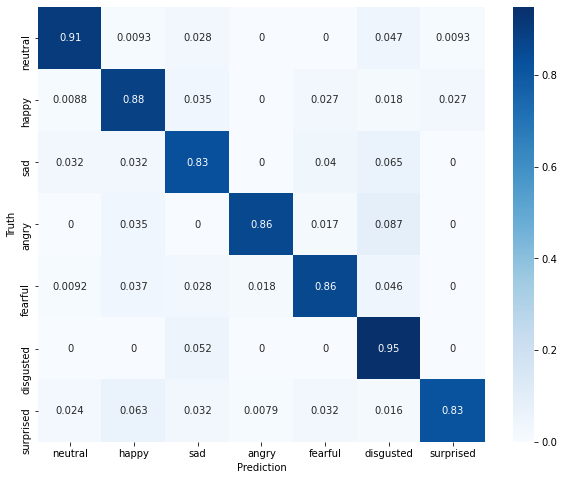

In [54]:
# Confusion matrix for model results on test data

plot_confusion(results['ground_truth'], results['prediction'])

In [55]:
# Function to determine model performance on the training set

def train_results(X, y, plot = True, normalize = True):
    
    # Create lists to hold truth and predictions. Initialize counter for correct predictions.
    truth = []
    pred = []
    corrects = 0

    # iterate through the list of training examples
    for i in range(X.shape[0]):
        tr = np.argmax(y[i]) # determine truth
        truth.append(tr)
        train_point = X[i].reshape(1, X.shape[1], X.shape[2], 1)
        pr = np.argmax(model.predict(train_point)) # make prediction
        pred.append(pr)
        
        # increment counter if correct
        if pr == tr:
            corrects += 1 
    
    # determine accuracy from number of correct predictions
    accuracy = corrects / X.shape[0]
    
    # plot confusion matrix using previously defined function
    if plot == True:
        plot_confusion(truth, pred, normalize = normalize)
    
    return accuracy

0.9781074348492591


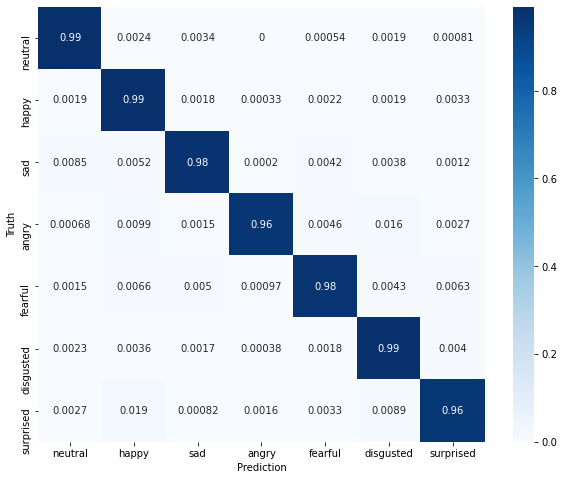

In [56]:
# Accuracy on training data
# Of course, we expect this to be very high

# Confusion matrix for model results on training data

acc = train_results(X, y)
print(acc)

In [57]:
# Load packages for additional visualizations

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure, show
from bokeh.embed import components
from bokeh.models import CategoricalColorMapper, HoverTool

In [58]:
results = pd.read_csv('test_results.csv')

results.drop(columns = 'Unnamed: 0', inplace = True)

In [59]:
results['correct'] = results['prediction'] == results['ground_truth']

In [60]:
test_dist = results['ground_truth'].value_counts()
correct_dist = results[results['correct'] == True]['ground_truth'].value_counts()

In [61]:
total_acc = results[results['correct'] == True].shape[0] / results.shape[0]

acc = []

for i in range(7):
    acc.append(correct_dist[i] / test_dist[i])

acc = acc
acc = [round(x*100,2) for x in acc]
emotions = ['Neutral', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgusted', 'Surprised']

df_acc = pd.DataFrame({'emotion': emotions, 'accuracy': acc})
df_acc.sort_values(by = 'accuracy', ascending = False, inplace = True)

emos = list(df_acc['emotion']) + ['Mean']
accs = list(df_acc['accuracy']) + [100*total_acc]

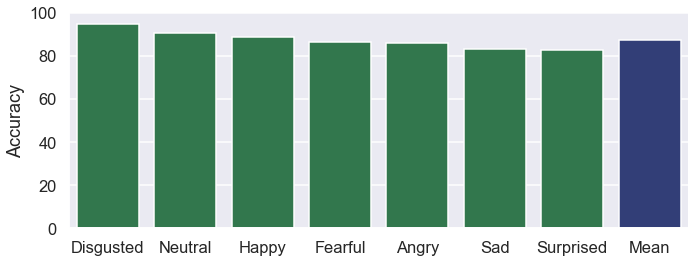

In [62]:
# Plot figure that shows model's accuracy for predicting each emotion on test data
# Mean accuracy displayed as blue bar on right

plt.figure(figsize=(10,4))
sns.set(style = 'darkgrid')
sns.set_context('talk')
sns.barplot(emos, accs, palette = ['#27824a','#27824a','#27824a','#27824a','#27824a',
                                   '#27824a','#27824a','#273682'])
sns.despine()
plt.ylim((0,100))
#plt.xlabel('Emotions')
#plt.xticks(rotation = 75)
plt.ylabel('Accuracy')
plt.tight_layout()